# Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

# Data collection and analysis

In [2]:
# Loading the diabetes dataset into pandas dataframe
dataset=pd.read_csv('diabetes.csv')

In [4]:
dataset.shape

(768, 9)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
dataset.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
dataset.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [10]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [12]:
dataset['Outcome'].value_counts()
# 0---> NON-DIABETIC
# 1--->DIABETIC


Outcome
0    500
1    268
Name: count, dtype: int64

In [13]:
countNoDisease = len(dataset[dataset.Outcome == 0])
countHaveDisease = len(dataset[dataset.Outcome == 1])
print("Percentage of patients dont have Diabetes: {:.2f}%".format((countNoDisease/(len(dataset.Outcome)))*100))
print("Percentage of patients have Diabetes: {:.2f}%".format((countHaveDisease/(len(dataset.Outcome)))*100))

Percentage of patients dont have Diabetes: 65.10%
Percentage of patients have Diabetes: 34.90%


In [14]:
young_ages = dataset[(dataset.Age>=29)&(dataset.Age<40)]
middle_ages =  dataset[(dataset.Age>=40)&(dataset.Age<55)]
elderly_ages =  dataset[(dataset.Age>=55)]

print("Young Ages", len(young_ages))
print("Middle Ages", len(middle_ages))
print("Elderly Ages", len(elderly_ages))

Young Ages 194
Middle Ages 153
Elderly Ages 54


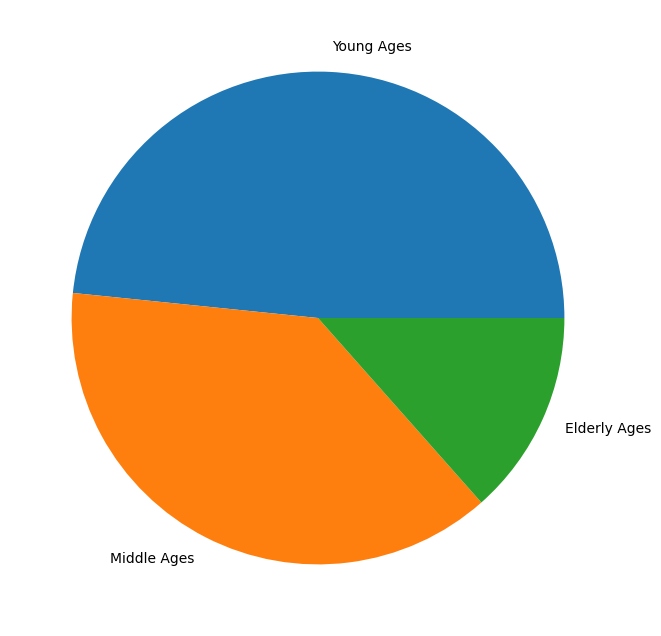

In [15]:
colors = ['blue','green','red']
explode= [1,1,1]
plt.figure(figsize=(8,8))
plt.pie([len(young_ages),len(middle_ages),len(elderly_ages)],labels=['Young Ages','Middle Ages','Elderly Ages'])
plt.show()

<Axes: xlabel='Outcome', ylabel='count'>

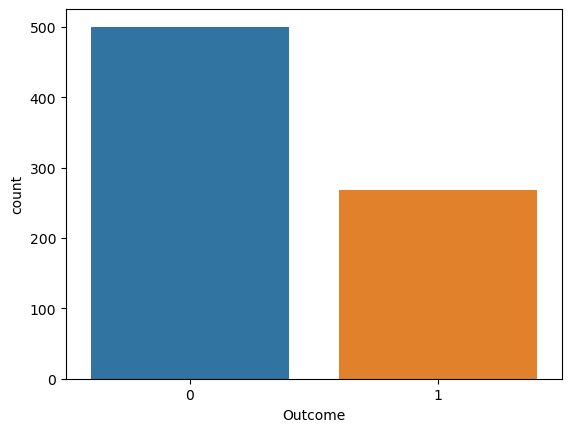

In [16]:
sns.countplot(x='Outcome',data=dataset)

<Axes: xlabel='Outcome', ylabel='Age'>

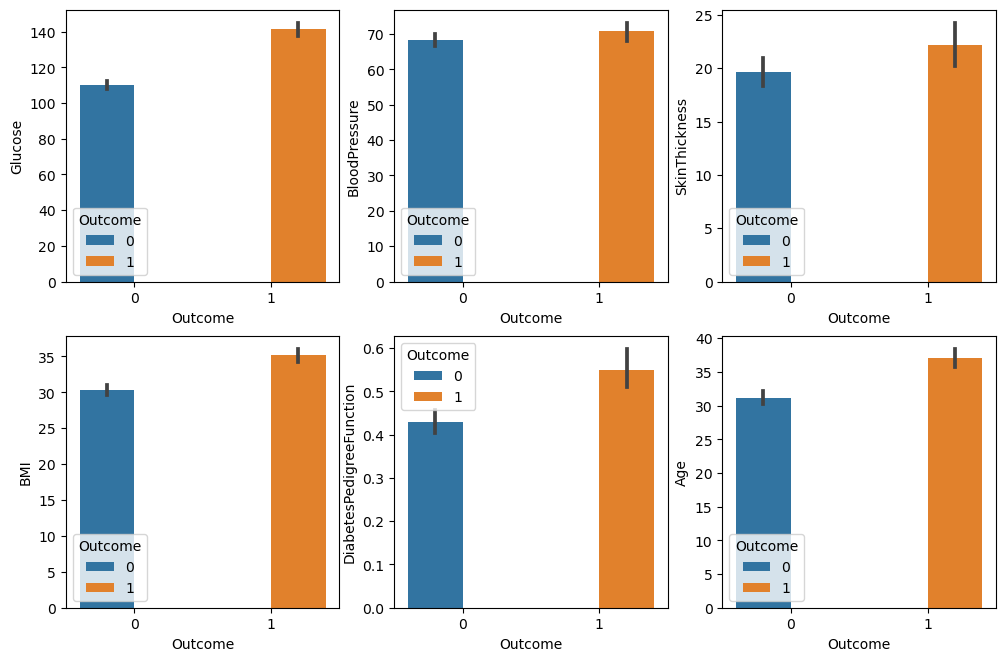

In [17]:
plt.figure(figsize=(12,12))
plt.subplot(3,3,1)
sns.barplot(x='Outcome',y='Glucose',data=dataset,hue="Outcome")
plt.subplot(3,3,2)
sns.barplot(x='Outcome',y='BloodPressure',data=dataset,hue="Outcome")
plt.subplot(3,3,3)
sns.barplot(x='Outcome',y='SkinThickness',data=dataset,hue="Outcome")
plt.subplot(3,3,4)
sns.barplot(x='Outcome',y='BMI',data=dataset,hue="Outcome")
plt.subplot(3,3,5)
sns.barplot(x='Outcome',y='DiabetesPedigreeFunction',data=dataset,hue="Outcome")
plt.subplot(3,3,6)
sns.barplot(x='Outcome',y='Age',data=dataset,hue="Outcome")

<Axes: xlabel='Pregnancies', ylabel='count'>

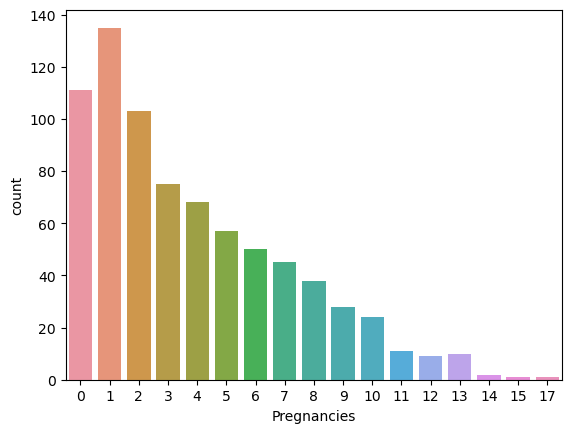

In [18]:
sns.countplot(x="Pregnancies",data=dataset)

# Machine Learning Model

### Seperating the data

In [19]:
X=dataset.drop(columns='Outcome',axis=1)
Y=dataset['Outcome']

In [20]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [21]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


### Data Standardization

In [22]:
scaler = StandardScaler()

In [23]:
scaler.fit(X)

StandardScaler()

In [24]:
standardized_data = scaler.transform(X)

In [25]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [26]:
X=standardized_data
Y=dataset['Outcome']

In [27]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


### Train Test split

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [29]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


### Training the Model

In [30]:
classifier = svm.SVC(kernel='linear')

In [31]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

### Model evaluation - Accuracy Score

In [32]:
#Accuracy score of training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [33]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7866449511400652


In [34]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [35]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7727272727272727


### Making Predictive System

In [36]:
input_data=(8,99,84,0,0,35.4,0.388,50)
# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 1.23388019 -0.68523633  0.77001375 -1.28821221 -0.69289057  0.43246741
  -0.25331639  1.4259954 ]]
[0]
The person is not diabetic


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


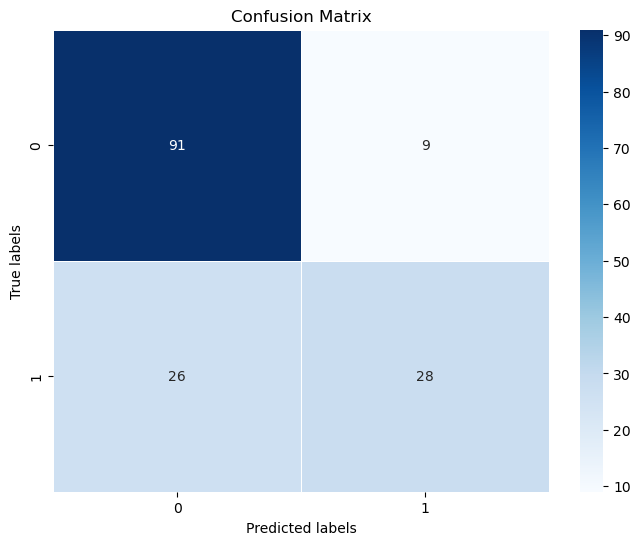

In [46]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have trained your model and made predictions on the test set
# Replace 'model' with the name of your trained model
# Replace 'X_test' with your test feature data

# Train your model (replace 'model' with your actual model)
classifier.fit(X_train, Y_train)

# Make predictions on the test set
predictions = classifier.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(Y_test, predictions)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", linewidths=.5)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

#print("Confusion Matrix:")
#print(cm)


In [42]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       100
           1       0.76      0.52      0.62        54

    accuracy                           0.77       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.77      0.77      0.76       154

